In [2]:
#Import required libraries
import pandas as pd 
import matplotlib.pyplot as plt
import datetime as dt

# Read data from file 'filename.csv' 
data = pd.read_csv("CA4_changes.csv") 

# Preview the first 5 lines of the loaded data 
data.head()

,revision,author,date,time,number_of_lines,comment
0,r1551925,Thomas,27/11/2015,16:57:44,1,Renamed folder to the correct name
1,r1551575,Thomas,27/11/2015,09:46:32,1,Removed unused webview.plan.management and web...
2,r1551569,Vincent,27/11/2015,09:38:09,1,enable all clients
3,r1551558,Thomas,27/11/2015,09:13:26,1,Chnaged jira url to htps
4,r1551504,/OU=Domain Control Validated/CN=svn.company.net,27/11/2015,07:05:41,1,[gradle-release] prepare for next development ...


In [3]:
#Make data into data frame
dframe= pd.DataFrame(data)

In [4]:
#Confirm type is now dataframe
print(type(dframe))

<class 'pandas.core.frame.DataFrame'>


In [5]:
#Check number of lines in dframe
dframe.index

RangeIndex(start=0, stop=422, step=1)

In [6]:
#Check Column names
dframe.columns

Index(['revision', 'author', 'date', 'time', 'number_of_lines', 'comment'], dtype='object')

In [7]:
#Shape indicates Columns by rows returned
dframe.shape

(422, 6)

In [8]:
#Learn the type of each Column
dframe.dtypes

revision           object
author             object
date               object
time               object
number_of_lines     int64
comment            object
dtype: object

In [10]:
#One Author name was very long in the data. 
#I have renamed this so that it will graph better
dframe.author=dframe.author.replace({'/OU=Domain Control Validated/CN=svn.company.net':'Domain Control'})

In [11]:
#Created a new variable called Author_Count. This will count the number of times each author has made a commit
Author_Count = dframe.author.value_counts()

In [12]:
#Count for each commit
dframe.groupby(['author', 'date'])['revision'].count()

author           date      
Alan             13/07/2015     1
                 15/07/2015     1
                 16/07/2015     3
Dave             12/11/2015     1
                 23/07/2015     1
Domain Control   03/11/2015     1
                 04/09/2015     1
                 06/08/2015     1
                 09/09/2015     2
                 09/10/2015     1
                 10/09/2015     1
                 13/08/2015     3
                 15/07/2015     2
                 16/11/2015     1
                 17/07/2015     1
                 17/11/2015     1
                 19/11/2015     1
                 20/08/2015     1
                 23/07/2015     1
                 23/11/2015     1
                 24/07/2015     1
                 24/08/2015     1
                 27/11/2015     1
                 30/07/2015     2
Freddie          03/09/2015     1
                 07/09/2015     2
                 19/11/2015     1
                 26/08/2015     2
                 28/

In [13]:
#Sum for each commit by No of Lines
dframe.groupby(['author'])['number_of_lines'].sum()

author
Alan                 8
Dave                 2
Domain Control      24
Freddie             14
Jimmy              154
Nicky               14
Thomas             234
Vincent             80
ajon0002            24
murari.krishnan      1
Name: number_of_lines, dtype: int64

In [15]:
Author = dframe.author.value_counts()
print(Author)

Thomas             191
Jimmy              152
Vincent             26
Domain Control      24
ajon0002             9
Freddie              7
Alan                 5
Nicky                5
Dave                 2
murari.krishnan      1
Name: author, dtype: int64


Text(0,0.5,'Frequency')

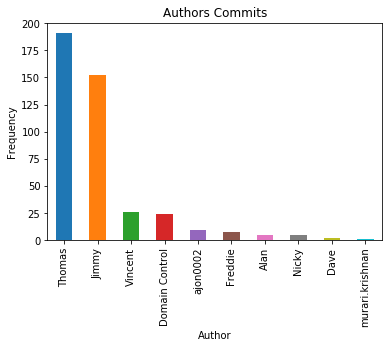

In [16]:
#Author_Count plotted using a bar graph
#Labels for x & y axis and title of graph created
Author_Count.plot(kind='bar')
plt.title("Authors Commits")
plt.xlabel("Author")
plt.ylabel("Frequency")

In [18]:
#Changed the format of the Date column to datetime
dframe.date = pd.to_datetime(dframe.date)

#New column in dframe created. This deduces the day of the week for each date
dframe['Day']=dframe.date.dt.day_name()

#Variable Day created to count the instance of commits on each day
Day = dframe.Day.value_counts()
print(Day)

Thursday     116
Wednesday    101
Friday        99
Tuesday       50
Monday        44
Saturday       7
Sunday         5
Name: Day, dtype: int64


Text(0.5,0,'Frequency')

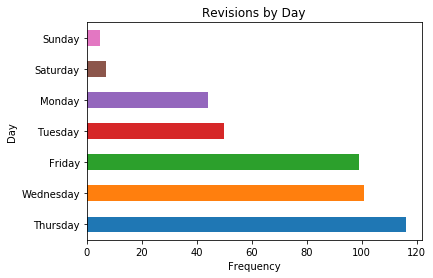

In [19]:
#Day plotted using a horizontal bar graph
#Labels for x & y axis and title of graph created
Day.plot(kind='barh')
plt.title("Revisions by Day")
plt.ylabel("Day")
plt.xlabel("Frequency")

In [20]:
#Breakdown of types of commits by day
dframe.groupby(['Day'])['number_of_lines'].sum()

Day
Friday       118
Monday        57
Saturday      18
Sunday         5
Thursday     150
Tuesday       79
Wednesday    128
Name: number_of_lines, dtype: int64

In [22]:
#New columns for hours created in dframe. This takes the hour information from the time column
dframe.Hours = dframe.time.map( lambda x: pd.to_datetime(x).hour )

#Hour variable created to count commits for each hour
Hour = dframe.Hours.value_counts()
Hour.sort_values()

19     1
5      1
18     2
7      2
20     3
6      3
17     4
8     12
10    30
12    31
9     33
16    39
15    52
13    56
11    57
14    96
Name: time, dtype: int64

Text(0.5,0,'Hour (24hr clock)')

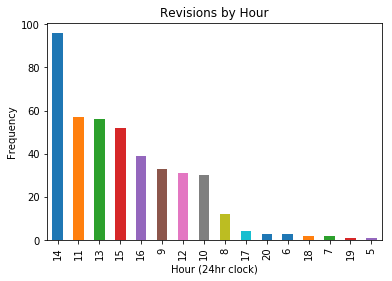

In [23]:
#Day plotted using a bar graph 
#Labels for x & y axis and title of graph created
Hour.plot(kind='bar')
plt.title("Revisions by Hour")
plt.ylabel("Frequency")
plt.xlabel("Hour (24hr clock)")

Text(0.5,0,'Hour (24hr clock)')

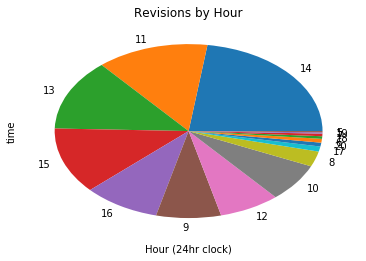

In [24]:
#Day plotted using a pie chart - harder to read than bar graph
#Label for data and title of graph created
Hour.plot(kind='pie')
plt.title("Revisions by Hour")
plt.xlabel("Hour (24hr clock)")